#### title: "Fitbit Analysis"
#### author: "Brandi Falls"
#### date: "7/13/2021"

***

# Overview of Project
Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device. Analyzing smart device fitness data could help unlock new growth opportunities for the company 
market. 

***

# Step 1 - Ask
## Business Task:
The business task is to analyze *Fitbit* smart device usage data in order to gain insight into how consumers currently use their smart devices and to discover underlying trends that can applied to *Bellabeat* products. This insight could help unlock new growth opportunities and the best marketing strategy to meet business growth goals. 

## Stakeholders
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat Executive Team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

## About the Company
* Founded in 2013
* By 2016, global offices and multiple products
* women-focused to empower women with knowledge about their own health and habits.
* Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits.

## Current Marketing Strategy
* E-commerce on their website - https://bellabeat.com/
* Online retailers
* Traditional advertising media 
  +radio
  + out-of-home billboards
  + print
  + television
* Digital marketing
  + Google Search
  + Facebook, Instagram, Twitter
  + Youtube video ads
  + Google Display Network ads

# Step 2 - Prepare
## Description of the Dataset

We have used a public dataset that explores smart device users’ daily habits.

Name: FitBit Fitness Tracker Data (CC0 Public Domain)
Link: https://www.kaggle.com/arashnic/fitbit

"This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. "

## Limitations
* There are limited users. The sample size may not be representative of the population
* There are few categorical variables to categorize the data for analysis
* There is no data on male and female population. We will not be able to make female-specific observations for a female target audience. 
* Each dataset has 30 days of data from 4/12/2016 to 5/12/2016, but the dataset description indicates 03/12/2016 to 05/12/2016. We will have less data to work with which may impact recommendations. 
* The first day of data collected is Tuesday 4/12/2016, and the last day of data collected is on  Thursday 5/12/2016. There is an unbalanced spread of days, so any weekly analysis could be misleading.

## ROCCC Validation of Dataset
* Reliable - we will assume this data is accurate and reliable.
* Original - The data is original as it is directly gathered from users
* Comprehensive - The data is not comprehensive as it does not have all details needed for a full detailed analysis to meet the business goal
* Current - The data is not current as the data is from 2016.
* Cited - The data is cited. 

## Data Summary 

Overall, this data may not be appropriate for conducting a full detailed analysis to meet the goal of the business. However, we will move forward with the data to uncover any insights. 

Ideally, we would be having a sample size that is more representative of the whole population, at least 6 months of data from a more current year, and gendered data so that we can gain insight into the specific female habits.

## Data Sensitivity
This is public data. No data was identified as sensitive and therefore we will not need to have Data anonymization / De-identification and no encryption to store data

## Setup Environment with Packages

In [243]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import janitor
import datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

## Import Data
* The below datasets were determined to be most useful for the purpose of this analysis. All other available datasets will not be in scope.
  + dailyActivity (daily physical activity)
  + sleepDay (daily sleep activity)
  + weightLogInfo (daily weight log activity)

In [244]:
#load data from csv files into data frames
dailyActivity = pd.read_csv(r'C:/Users/Brandi/Documents/Bellabeat Case Study/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
sleepDay = pd.read_csv(r'C:/Users/Brandi/Documents/Bellabeat Case Study/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weightLogInfo = pd.read_csv(r'C:/Users/Brandi/Documents/Bellabeat Case Study/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

## First Look

In [245]:
dailyActivity.head()
sleepDay.head()
weightLogInfo.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


## Observations from First Look
* Column names need to be cleaned
* Common variables are ID and ActivityDate/ActivityDay. 
* Date variables are in format MM/DD/YYYY but are Character data type. 
* We will need to rename Day --> Date for consistency, and convert to Date field.
* LoggedActivitiesDistance has a lot of 0 values and are not consistent (0 vs.0.00). Assumption is that it is not required to log most activities, but some activities require manual entry. Users rely on automated tracking and will not automatically log. 
* file sleepDay should be renamed to dailySleep. SleepDay column should be renamed to ActivityDate and formatted to MM/DD/YYYY for consistency

# Step 3 - Process

**Summary of Cleaning:** 

1. Created new dataframes with simple names for easy reference
2. Checked for missing (NA/null) data
3. Checked for duplicate data
4. Stored and then removed duplicate data
5. Renamed variables for consistency and joining
6. Converted all Date variables from Character to Date
7. Organized data by sorting by date
8. Converted ID from Number to Character for display purposes
9. Added a Day column to categorize data by days
10. Added a Record Type variable for categorical purposes
11. Performed a Set Difference between additional data to confirm all data was already present in the merged dataset DailyActivity

In [246]:
#checking for missing data (NULL)
for col in dailyActivity.columns:
    pct_missing = np.mean(dailyActivity[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print("---")

for col in sleepDay.columns:
    pct_missing = np.mean(sleepDay[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print("---")

for col in weightLogInfo.columns:
    pct_missing = np.mean(weightLogInfo[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

#checking for missing data (NA)
for col in dailyActivity.columns:
    pct_missing = np.mean(dailyActivity[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print("---")

for col in sleepDay.columns:
    pct_missing = np.mean(sleepDay[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print("---")

for col in weightLogInfo.columns:
    pct_missing = np.mean(weightLogInfo[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# weightLogInfo["Fat"] has missing data, but we will retain it. 

Id - 0%
ActivityDate - 0%
TotalSteps - 0%
TotalDistance - 0%
TrackerDistance - 0%
LoggedActivitiesDistance - 0%
VeryActiveDistance - 0%
ModeratelyActiveDistance - 0%
LightActiveDistance - 0%
SedentaryActiveDistance - 0%
VeryActiveMinutes - 0%
FairlyActiveMinutes - 0%
LightlyActiveMinutes - 0%
SedentaryMinutes - 0%
Calories - 0%
---
Id - 0%
SleepDay - 0%
TotalSleepRecords - 0%
TotalMinutesAsleep - 0%
TotalTimeInBed - 0%
---
Id - 0%
Date - 0%
WeightKg - 0%
WeightPounds - 0%
Fat - 97%
BMI - 0%
IsManualReport - 0%
LogId - 0%
Id - 0%
ActivityDate - 0%
TotalSteps - 0%
TotalDistance - 0%
TrackerDistance - 0%
LoggedActivitiesDistance - 0%
VeryActiveDistance - 0%
ModeratelyActiveDistance - 0%
LightActiveDistance - 0%
SedentaryActiveDistance - 0%
VeryActiveMinutes - 0%
FairlyActiveMinutes - 0%
LightlyActiveMinutes - 0%
SedentaryMinutes - 0%
Calories - 0%
---
Id - 0%
SleepDay - 0%
TotalSleepRecords - 0%
TotalMinutesAsleep - 0%
TotalTimeInBed - 0%
---
Id - 0%
Date - 0%
WeightKg - 0%
WeightPounds -

In [247]:
# Checking data types
dailyActivity.dtypes
sleepDay.dtypes
weightLogInfo.dtypes


Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [248]:
#cleaning data frames
#changing dataframe names, standardize col names, remove empty rows, renaming columns
updated_daily_activity = (
    dailyActivity
      .clean_names(None, 'snake')
      .remove_empty()
)

updated_daily_sleep = (
    sleepDay
      .clean_names(None, 'snake')
      .remove_empty()
      .rename_column('sleep_day','activity_date')
)

updated_weight_log = (
    weightLogInfo
      .clean_names(None, 'snake')
      .remove_empty()
      .rename_column('date',"activity_date")
)

In [249]:
#changing activity date string to datetime 
updated_daily_activity['activity_date'] = pd.to_datetime(updated_daily_activity['activity_date'])
updated_daily_sleep['activity_date'] = pd.to_datetime(updated_daily_sleep['activity_date'])
updated_weight_log['activity_date'] = pd.to_datetime(updated_weight_log['activity_date'])

In [250]:
#adding weekday column
updated_daily_activity['weekday'] = updated_daily_activity['activity_date'].dt.day_name()
updated_daily_sleep['weekday'] = updated_daily_sleep['activity_date'].dt.day_name()
updated_weight_log['weekday'] = updated_weight_log['activity_date'].dt.day_name()

In [251]:
#change data types of ID from int to string
updated_daily_activity['id'] = updated_daily_activity['id'].astype(str)
updated_daily_sleep['id'] = updated_daily_sleep['id'].astype(str)
updated_weight_log['id'] = updated_weight_log['id'].astype(str)

In [252]:
#check for duplicate data
updated_daily_activity.duplicated().sum()
updated_daily_sleep.duplicated().sum()
updated_weight_log.duplicated().sum()

0

3

0

In [253]:
updated_daily_sleep.loc[updated_daily_sleep.duplicated(), :]

,id,activity_date,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekday
161,4388161847,2016-05-05,1,471,495,Thursday
223,4702921684,2016-05-07,1,520,543,Saturday
380,8378563200,2016-04-25,1,388,402,Monday


In [254]:
updated_daily_sleep = updated_daily_sleep.drop_duplicates()
updated_daily_sleep.duplicated().sum()

0

In [255]:
# sort by Date
updated_daily_activity = updated_daily_activity.sort_values(by=['activity_date'], inplace=False, ascending=True)
updated_daily_sleep = updated_daily_sleep.sort_values(by=['activity_date'], inplace=False, ascending=True)
updated_weight_log = updated_weight_log.sort_values(by=['activity_date'], inplace=False, ascending=True)

In [256]:
#add report type variable for categorical data
updated_weight_log['report_type'] = np.where(updated_weight_log['is_manual_report'] == True, "Manual", "Automated")

In [257]:
#validating new reoport type column
np.sum(updated_weight_log["report_type"] == "Manual")
np.sum(updated_weight_log["is_manual_report"] == True)

np.sum(updated_weight_log["report_type"] == "Automated")
np.sum(updated_weight_log["is_manual_report"] == False)

41

41

26

26

In [258]:
#comapre data frames
calorie_comparison_test = updated_daily_activity[["id","activity_date","calories"]]

intensity_comparison_test = updated_daily_activity[["id","activity_date","sedentary_minutes","lightly_active_minutes", "fairly_active_minutes","very_active_minutes","sedentary_active_distance","light_active_distance","moderately_active_distance","very_active_distance"]]

daily_steps_comparison_test = updated_daily_activity[["id","activity_date","total_steps"]]

dailyCalories = pd.read_csv(r'C:/Users/Brandi/Documents/Bellabeat Case Study/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
dailyIntensities  = pd.read_csv(r'C:/Users/Brandi/Documents/Bellabeat Case Study/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
dailySteps  = pd.read_csv(r'C:/Users/Brandi/Documents/Bellabeat Case Study/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')

a1 = (
    dailyCalories
      .clean_names(None, 'snake')
      .remove_empty()
      .rename_column('activity_day','activity_date')
)

a2 = (
    dailyIntensities
      .clean_names(None, 'snake')
      .remove_empty()
      .rename_column('activity_day','activity_date')
)

a3 = (
    dailySteps
      .clean_names(None, 'snake')
      .remove_empty()
      .rename_column('activity_day','activity_date')
      .rename_column('step_total','total_steps')
)

a1['id'] = a1['id'].astype(str)
a2['id'] = a2['id'].astype(str)
a3['id'] = a3['id'].astype(str)

a1['activity_date'] = pd.to_datetime(a1['activity_date'])
a2['activity_date'] = pd.to_datetime(a2['activity_date'])
a3['activity_date'] = pd.to_datetime(a3['activity_date'])

#looking for differences between data sets, none. 
pd.concat([calorie_comparison_test,a1]).drop_duplicates(keep=False)
pd.concat([intensity_comparison_test,a2]).drop_duplicates(keep=False)
pd.concat([daily_steps_comparison_test,a3]).drop_duplicates(keep=False)

,id,activity_date,calories


,id,activity_date,sedentary_minutes,lightly_active_minutes,fairly_active_minutes,very_active_minutes,sedentary_active_distance,light_active_distance,moderately_active_distance,very_active_distance


,id,activity_date,total_steps


# Step 4 - Analyze

**Summary of Analysis Process**

1. Counted distinct participants in each dataframe
2. Examined date ranges in each dataframe
3. Merged dataframes
4. Created an order for days of the week for visualizations
5. Viewed summary statistics of each dataframe
6. Analyzed percentages of manual vs automated activity logs
7. Analyzed percentages of participants of each category

In [259]:
#quick view of clean data
updated_daily_activity.head()
updated_daily_sleep.head()
updated_weight_log.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,weekday
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
123,1927972279,2016-04-12,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday
154,2022484408,2016-04-12,11875,8.34,8.34,0.0,3.31,0.77,4.26,0.0,42,14,227,1157,2390,Tuesday
909,8877689391,2016-04-12,23186,20.40,20.40,0.0,12.22,0.34,7.82,0.0,85,7,312,1036,3921,Tuesday
185,2026352035,2016-04-12,4414,2.74,2.74,0.0,0.19,0.35,2.20,0.0,3,8,181,706,1459,Tuesday


,id,activity_date,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekday
0,1503960366,2016-04-12,1,327,346,Tuesday
109,4020332650,2016-04-12,1,501,541,Tuesday
167,4445114986,2016-04-12,2,429,457,Tuesday
200,4702921684,2016-04-12,1,425,439,Tuesday
228,5553957443,2016-04-12,1,441,464,Tuesday


,id,activity_date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,weekday,report_type
43,8877689391,2016-04-12 06:47:11,85.800003,189.156628,NaN,25.680000,False,1460443631000,Tuesday,Automated
13,6962181067,2016-04-12 23:59:59,62.500000,137.788914,NaN,24.389999,True,1460505599000,Tuesday,Manual
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000,Wednesday,Automated
44,8877689391,2016-04-13 06:55:00,84.900002,187.172464,NaN,25.410000,False,1460530500000,Wednesday,Automated
14,6962181067,2016-04-13 23:59:59,62.099998,136.907061,NaN,24.240000,True,1460591999000,Wednesday,Manual


In [260]:
#unique participants in each dataframe
updated_daily_activity["id"].nunique()
updated_daily_sleep["id"].nunique()
updated_weight_log["id"].nunique()

33

24

8

In [261]:
#Examining Date Ranges. All date ranges are the same
updated_daily_activity["activity_date"].min()
updated_daily_sleep["activity_date"].min()
updated_weight_log["activity_date"].min()

print("---")

updated_daily_activity["activity_date"].max()
updated_daily_sleep["activity_date"].max()
updated_weight_log["activity_date"].max()

print("---")

updated_daily_activity["activity_date"].max() - updated_daily_activity["activity_date"].min()
updated_daily_sleep["activity_date"].max() - updated_daily_sleep["activity_date"].min()
updated_weight_log["activity_date"].max() - updated_weight_log["activity_date"].min()

Timestamp('2016-04-12 00:00:00')

Timestamp('2016-04-12 00:00:00')

Timestamp('2016-04-12 06:47:11')

---


Timestamp('2016-05-12 00:00:00')

Timestamp('2016-05-12 00:00:00')

Timestamp('2016-05-12 23:59:59')

---


Timedelta('30 days 00:00:00')

Timedelta('30 days 00:00:00')

Timedelta('30 days 17:12:48')

In [262]:
#quick summary statistics
updated_daily_activity[["total_steps", "total_distance", "sedentary_minutes"]].describe()
updated_daily_sleep [["total_sleep_records", "total_minutes_asleep", "total_time_in_bed"]].describe()
updated_weight_log [["weight_pounds", "bmi", "fat"]].describe()

,total_steps,total_distance,sedentary_minutes
count,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,991.210638
std,5087.150742,3.924606,301.267437
min,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,729.750000
50%,7405.500000,5.245000,1057.500000
75%,10727.000000,7.712500,1229.500000
max,36019.000000,28.030001,1440.000000


,total_sleep_records,total_minutes_asleep,total_time_in_bed
count,410.000000,410.000000,410.000000
mean,1.119512,419.173171,458.482927
std,0.346636,118.635918,127.455140
min,1.000000,58.000000,61.000000
25%,1.000000,361.000000,403.750000
50%,1.000000,432.500000,463.000000
75%,1.000000,490.000000,526.000000
max,3.000000,796.000000,961.000000


,weight_pounds,bmi,fat
count,67.000000,67.000000,2.00000
mean,158.811801,25.185224,23.50000
std,30.695415,3.066963,2.12132
min,115.963147,21.450001,22.00000
25%,135.363832,23.959999,22.75000
50%,137.788914,24.389999,23.50000
75%,187.503152,25.559999,24.25000
max,294.317120,47.540001,25.00000


In [298]:
#percentages
print("percent with 0 logged activities:","{:.2%}".format(np.sum(updated_daily_activity["logged_activities_distance"] == 0) / updated_daily_activity["logged_activities_distance"].count()))
print("percent with 0 distance:","{:.2%}".format(np.sum(updated_daily_activity["total_distance"] == 0) / updated_daily_activity["total_distance"].count()))
print("percent users particpated in weight logging:","{:.2%}".format(updated_weight_log["id"].nunique() / updated_daily_activity["id"].nunique()))
print("percent users particpated in sleep logging:","{:.2%}".format(updated_daily_sleep["id"].nunique() / updated_daily_activity["id"].nunique()))

percent with 0 logged activities: 96.60%
percent with 0 distance: 8.30%
percent users particpated in weight logging: 24.24%
percent users particpated in sleep logging: 72.73%


In [268]:
#merge daily activity + daily sleep outer join
combined_sleep_activity = pd.merge(updated_daily_sleep, updated_daily_activity, how="right", on=["id","activity_date"])

In [269]:
#merge all daily data outer join
combined_all_daily = pd.merge(combined_sleep_activity, updated_weight_log, how="left", on=["id"])

In [299]:
combined_sleep_activity.head()
combined_all_daily.head()

,id,activity_date,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekday_x,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,weekday_y
0,1503960366,2016-04-12,1.0,327.0,346.0,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1927972279,2016-04-12,3.0,750.0,775.0,Tuesday,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday
2,2022484408,2016-04-12,NaN,NaN,NaN,NaN,11875,8.34,8.34,0.0,3.31,0.77,4.26,0.0,42,14,227,1157,2390,Tuesday
3,8877689391,2016-04-12,NaN,NaN,NaN,NaN,23186,20.40,20.40,0.0,12.22,0.34,7.82,0.0,85,7,312,1036,3921,Tuesday
4,2026352035,2016-04-12,1.0,503.0,546.0,Tuesday,4414,2.74,2.74,0.0,0.19,0.35,2.20,0.0,3,8,181,706,1459,Tuesday


,id,activity_date_x,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekday_x,total_steps,total_distance,tracker_distance,logged_activities_distance,...,weekday_y,activity_date_y,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,weekday,report_type
0,1503960366,2016-04-12,1.0,327.0,346.0,Tuesday,13162,8.50,8.50,0.0,...,Tuesday,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1.462234e+12,Monday,Manual
1,1503960366,2016-04-12,1.0,327.0,346.0,Tuesday,13162,8.50,8.50,0.0,...,Tuesday,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1.462320e+12,Tuesday,Manual
2,1927972279,2016-04-12,3.0,750.0,775.0,Tuesday,678,0.47,0.47,0.0,...,Tuesday,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1.460510e+12,Wednesday,Automated
3,2022484408,2016-04-12,NaN,NaN,NaN,NaN,11875,8.34,8.34,0.0,...,Tuesday,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8877689391,2016-04-12,NaN,NaN,NaN,NaN,23186,20.40,20.40,0.0,...,Tuesday,2016-04-12 06:47:11,85.800003,189.156628,NaN,25.680000,False,1.460444e+12,Tuesday,Automated


In [300]:
combined_sleep_activity["id"].nunique()
combined_all_daily["id"].nunique()

33

33

In [272]:
average_steps_overall = updated_daily_activity["total_steps"].mean()

# Step 5 - Share
## Visualizations
### Graphs Categorized by Weekday

In [273]:
avg_steps_day = updated_daily_activity.groupby(["weekday"])["total_steps"].mean().sort_values(ascending = False)
avg_steps_day

weekday
Saturday     8152.975806
Tuesday      8125.006579
Monday       7780.866667
Wednesday    7559.373333
Friday       7448.230159
Thursday     7405.836735
Sunday       6933.231405
Name: total_steps, dtype: float64

<AxesSubplot:xlabel='weekday'>

Text(0.5, 1.0, 'Average Steps per Day')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Total')

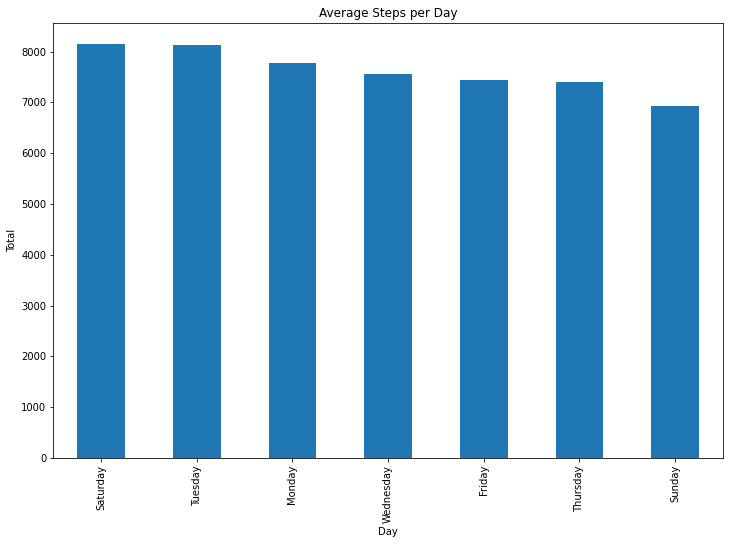

In [275]:
avg_steps_day.plot(kind="bar")
plt.title("Average Steps per Day")
plt.xlabel("Day")
plt.ylabel("Total")

In [274]:
total_steps_day = updated_daily_activity.groupby(["weekday"])["total_steps"].sum().sort_values(ascending = False)
total_steps_day

weekday
Tuesday      1235001
Wednesday    1133906
Thursday     1088658
Saturday     1010969
Friday        938477
Monday        933704
Sunday        838921
Name: total_steps, dtype: int64

<AxesSubplot:xlabel='weekday'>

Text(0.5, 1.0, 'Total Steps per Day')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Total Steps')

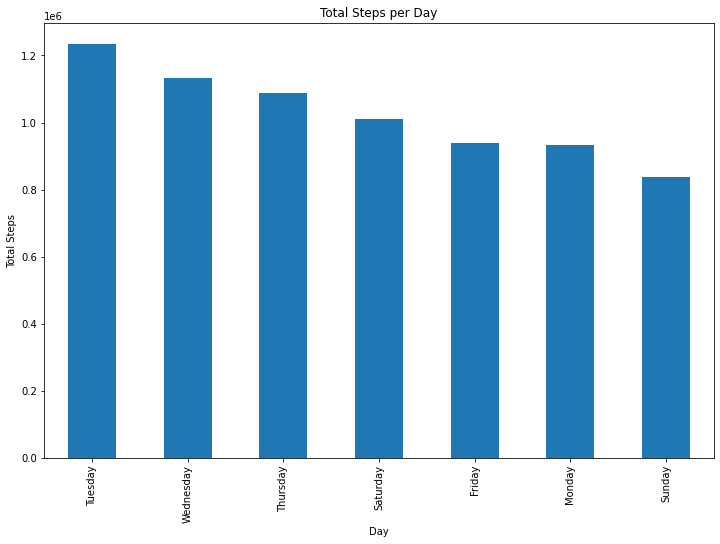

In [276]:
total_steps_day.plot(kind="bar")
plt.title("Total Steps per Day")
plt.xlabel("Day")
plt.ylabel("Total Steps")

<AxesSubplot:xlabel='weekday'>

Text(0.5, 1.0, 'Average Minutes per Intensity')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Average Minutes')

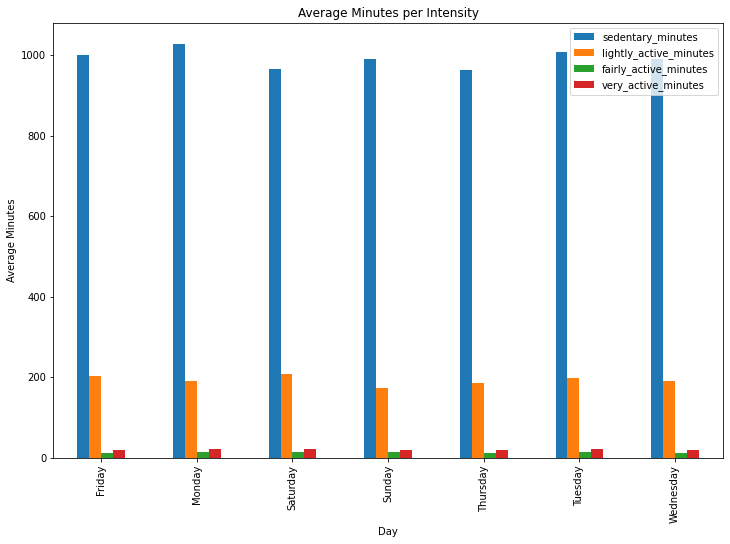

In [288]:
#average minutes per level
dataplot = updated_daily_activity[["weekday","sedentary_minutes","lightly_active_minutes", "fairly_active_minutes","very_active_minutes"]]
dataplot = dataplot.groupby('weekday').agg('mean')
dataplot.plot(kind="bar")
plt.title("Average Minutes per Intensity")
plt.xlabel("Day")
plt.ylabel("Average Minutes")

<AxesSubplot:xlabel='weekday'>

Text(0.5, 1.0, 'Average Distance per Intensity')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Average Distance')

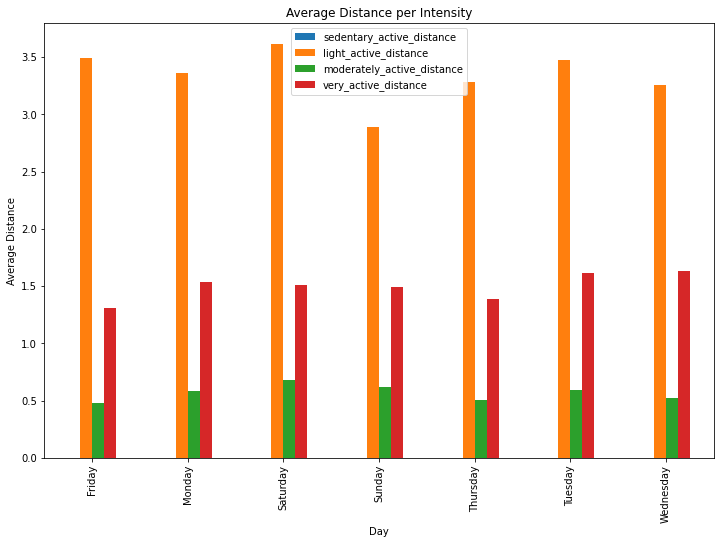

In [289]:
#average distance per level
dataplot = updated_daily_activity[["weekday","sedentary_active_distance","light_active_distance","moderately_active_distance","very_active_distance"]]
dataplot = dataplot.groupby('weekday').agg('mean')
dataplot.plot(kind="bar")
plt.title("Average Distance per Intensity")
plt.xlabel("Day")
plt.ylabel("Average Distance")

### Relationships and Trend Lines

<AxesSubplot:xlabel='total_time_in_bed', ylabel='total_minutes_asleep'>

Text(0.5, 1.0, 'Time in Bed vs Time Asleep')

Text(0, 0.5, 'In Bed')

Text(0.5, 0, 'Asleep')

Text(600, 800, '7-9 hour recommended')

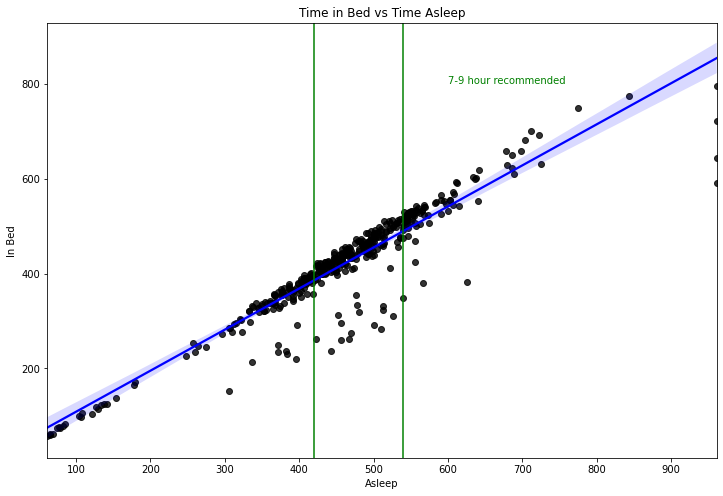

In [279]:
#relationship between total_time_in_bed and total_minutes_asleep
sns.regplot(x="total_time_in_bed", y="total_minutes_asleep", data=updated_daily_sleep, scatter_kws={"color":"black"}, line_kws={"color":"blue"})

plt.title("Time in Bed vs Time Asleep") 
plt.ylabel("In Bed")
plt.xlabel("Asleep") 
plt.axvline(420, color='green')
plt.axvline(540, color='green')
plt.text(600,800,'7-9 hour recommended', color='green')
plt.show()

<AxesSubplot:xlabel='total_steps', ylabel='sedentary_minutes'>

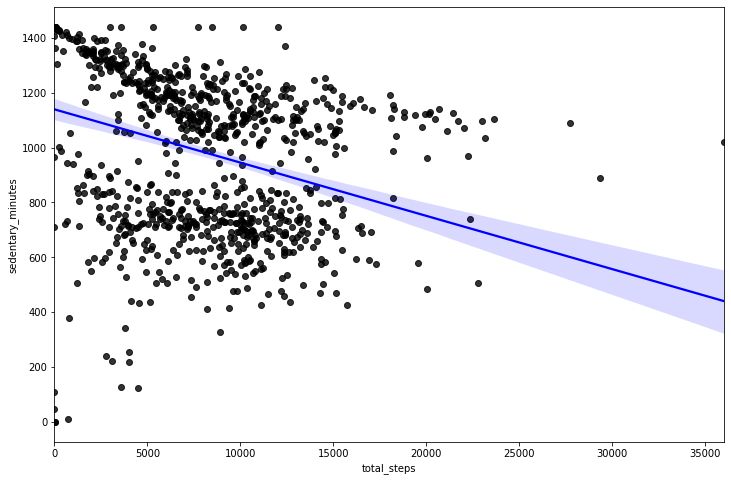

In [280]:
#relationship between total_steps and sedentary_minutes
sns.regplot(x="total_steps", y="sedentary_minutes", data=updated_daily_activity, scatter_kws={"color":"black"}, line_kws={"color":"blue"})

<AxesSubplot:xlabel='total_minutes_asleep', ylabel='total_steps'>

Text(0.5, 1.0, 'Steps vs Sleep')

Text(0, 0.5, 'Minutes Asleep')

Text(0.5, 0, 'Total Steps')

Text(600, 20000, '7-9 hour recommended')

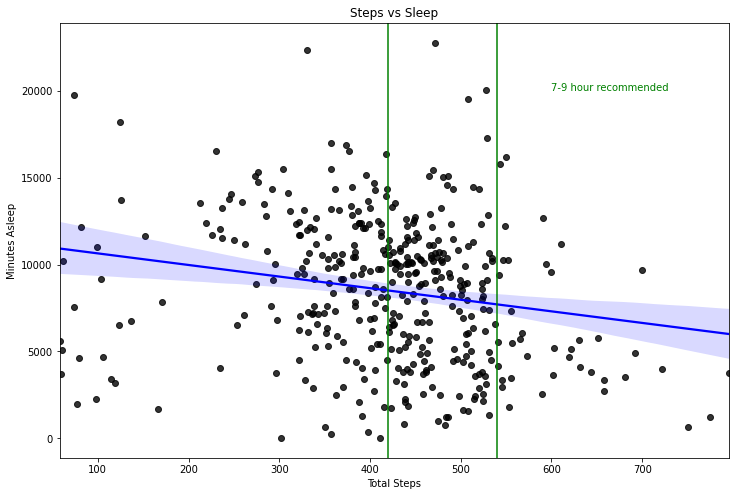

In [281]:
#total steps vs total minutes asleep
sns.regplot(x="total_minutes_asleep", y="total_steps", data=combined_sleep_activity, scatter_kws={"color":"black"}, line_kws={"color":"blue"})

plt.title("Steps vs Sleep") 
plt.ylabel("Minutes Asleep")
plt.xlabel("Total Steps") 
plt.axvline(420, color='green')
plt.axvline(540, color='green')
plt.text(600,20000,'7-9 hour recommended', color='green')
plt.show()

In [ ]:
#total minutes asleep vs calories
sns.regplot(x="total_minutes_asleep", y="calories", data=combined_sleep_activity, scatter_kws={"color":"black"}, line_kws={"color":"blue"})

plt.title("Sleep vs Calories") 
plt.ylabel("Minutes Asleep")
plt.xlabel("Calories") 
plt.axvline(420, color='green')
plt.axvline(540, color='green')
plt.text(600,4000,'7-9 hour recommended', color='green')
plt.show()

### Participation Graphs

In [ ]:
#step count per user

user_total_steps = updated_daily_activity.groupby('id')[["total_steps"]].sum().sort_values('total_steps', ascending = False)

top_10_users = user_total_steps[:10]

<AxesSubplot:xlabel='id'>

Text(0.5, 1.0, 'Total Steps per User')

Text(0.5, 0, 'User')

Text(0, 0.5, 'Total Steps')

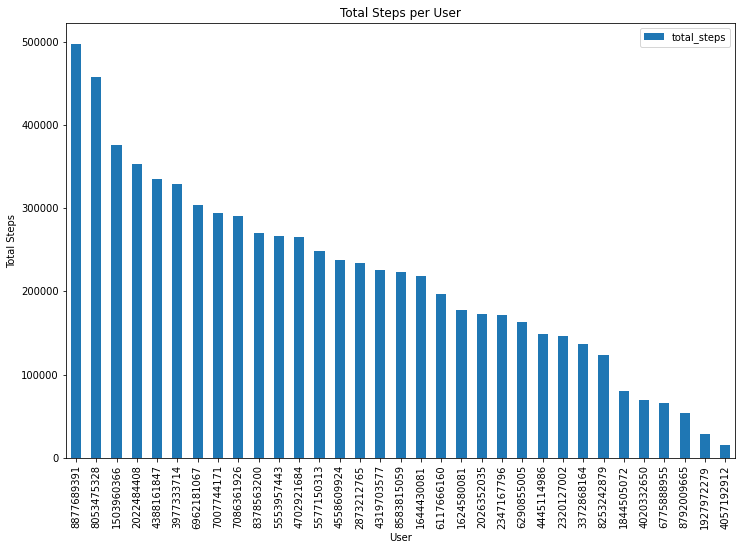

In [278]:
user_total_steps.plot(kind="bar")
plt.title("Total Steps per User")
plt.xlabel("User")
plt.ylabel("Total Steps")

<AxesSubplot:>

Text(0.5, 1.0, 'Physical Activity Participant Frequency')

Text(0.5, 0, 'User ID')

Text(0, 0.5, 'Total Log Count')

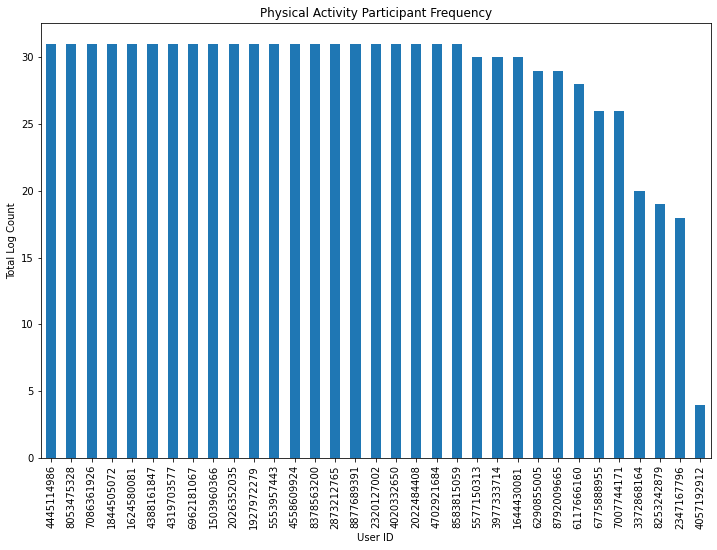

In [215]:
#Participation
updated_daily_activity['id'].value_counts().plot(kind='bar')
plt.title("Physical Activity Participant Frequency")
plt.xlabel("User ID")
plt.ylabel("Total Log Count")

<AxesSubplot:>

Text(0.5, 1.0, 'Sleep Participant Frequency')

Text(0.5, 0, 'User ID')

Text(0, 0.5, 'Total Log Count')

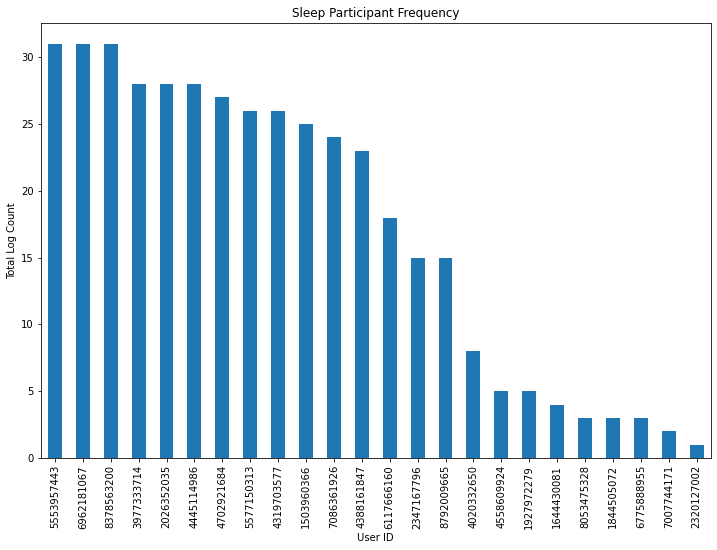

In [214]:
updated_daily_sleep['id'].value_counts().plot(kind='bar')
plt.title("Sleep Participant Frequency")
plt.xlabel("User ID")
plt.ylabel("Total Log Count")

<AxesSubplot:>

Text(0.5, 1.0, 'Weight Log Particpant Frequency')

Text(0.5, 0, 'User ID')

Text(0, 0.5, 'Total Log Count')

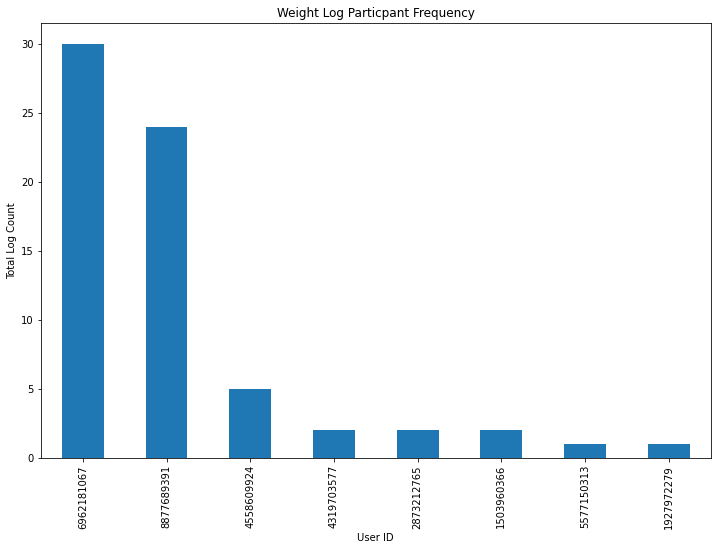

In [164]:
updated_weight_log['id'].value_counts().plot(kind='bar')
plt.title("Weight Log Particpant Frequency")
plt.xlabel("User ID")
plt.ylabel("Total Log Count")

([<matplotlib.patches.Wedge at 0x21561f418b0>,
 [Text(-1.0996788130378836, -0.026580221135116266, 'Physical'),
  Text(1.0285179484228668, -0.3900651609308596, 'Sleep'),
  Text(0.41480408775850713, 1.0187922107961136, 'Weight')],
 [Text(-0.5998248071115728, -0.014498302437336144, '50.8%'),
  Text(0.5610097900488363, -0.21276281505319614, '36.9%'),
  Text(0.22625677514100387, 0.5557048422524256, '12.3%')])

(-1.1039992533980778, 1.11951741980678, -1.105538688392744, 1.10026377876888)

Text(0.5, 1.0, 'All Participation Activity')

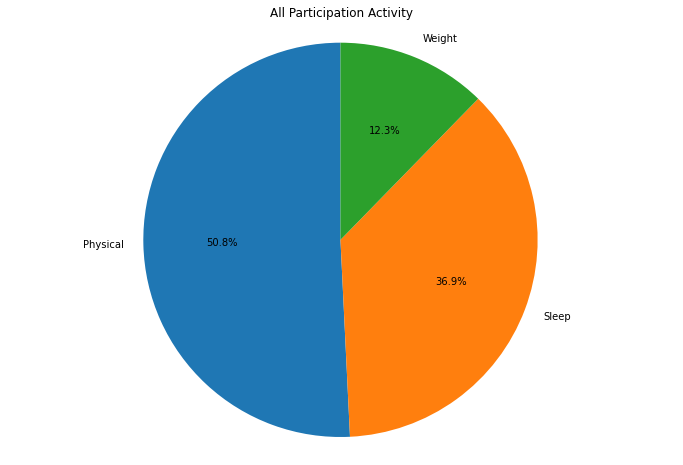

In [290]:
#all particpation activity
record_type = ["Physical", "Sleep", "Weight"]
distinct_user_count = [updated_daily_activity["id"].nunique(),updated_daily_sleep["id"].nunique(),updated_weight_log["id"].nunique()]

fig1, ax1 = plt.subplots()
ax1.pie(distinct_user_count, labels=record_type, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("All Participation Activity")

plt.show()

### Correlation Anaysis

In [ ]:
#correlation
combined_all_daily.corr(method ='pearson')

In [ ]:
updated_daily_activity.corr(method ='pearson')

In [ ]:
updated_daily_sleep.corr(method ='pearson')

In [ ]:
updated_weight_log.corr(method ='pearson')

In [ ]:
correlation_matrix = combined_all_daily.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Activity features")
plt.ylabel("Activity features")
plt.show()

In [ ]:
# Using factorize - this assigns a random numeric value for each unique categorical value

combined_all_daily.apply(lambda x: x.factorize()[0]).corr(method='pearson')

In [ ]:

correlation_matrix = combined_all_daily.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Activity features")
plt.ylabel("Activity features")
plt.show()

In [ ]:
correlation_mat = combined_all_daily.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

In [ ]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

### Manual vs Automated Preferences

([<matplotlib.patches.Wedge at 0x21509173790>,
 [Text(-1.032678299049469, -0.37891361901137266, 'Manual'),
  Text(1.0326782635730112, 0.37891371569769106, 'Automated')],
 [Text(-0.5632790722088012, -0.20668015582438506, '61.2%'),
  Text(0.5632790528580061, 0.20668020856237693, '38.8%')])

(-1.1139745841440791,
 1.1207263558740126,
 -1.1113988841029616,
 1.100542844170187)

Text(0.5, 1.0, 'Manual vs Automated Weight Logs')

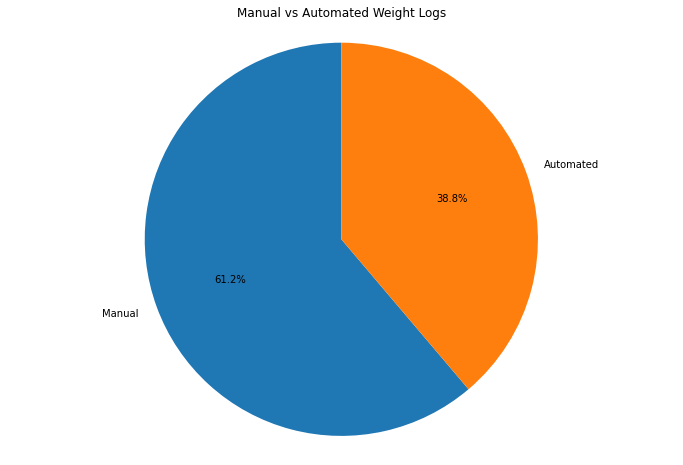

In [221]:
# Pie chart
data = updated_weight_log['report_type'].value_counts()
labels = 'Manual', 'Automated'
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Manual vs Automated Weight Logs")

plt.show()

([<matplotlib.patches.Wedge at 0x215091c83a0>,
 [Text(1.0937151825418197, 0.11741848013628155, 'Manual'),
  Text(-1.0937151770450626, -0.11741853133678419, 'Automated')],
 [Text(0.5965719177500833, 0.06404644371069902, '3.4%'),
  Text(-0.5965719147518523, -0.06404647163824591, '96.6%')])

(-1.1082151582541035,
 1.1003912104513915,
 -1.1059873583562982,
 1.1080560958448729)

Text(0.5, 1.0, 'Manual vs Automated Physical Activity Logs')

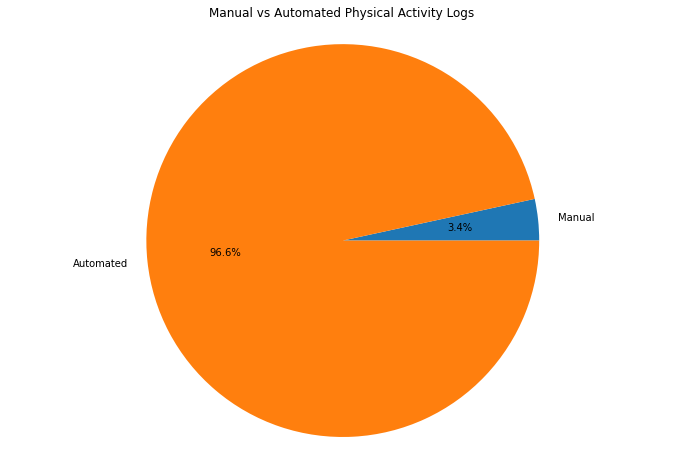

In [222]:
#percent of total records of 0 logged activities
manual_physical = np.sum(updated_daily_activity["logged_activities_distance"] != 0)
automated_physical = np.sum(updated_daily_activity["logged_activities_distance"] == 0)
record_type_count = [manual_physical,automated_physical]

labels = 'Manual', 'Automated'
fig1, ax1 = plt.subplots()
ax1.pie(record_type_count, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Manual vs Automated Physical Activity Logs")

plt.show()

### Time Lapse 

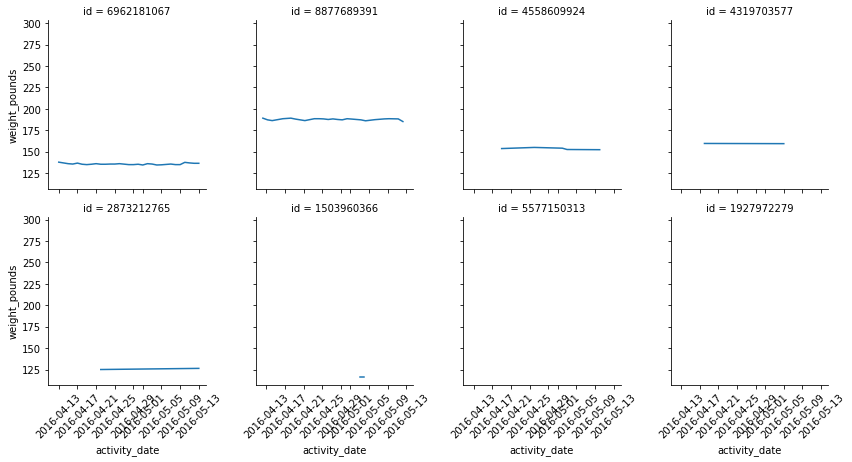

In [236]:
g = sns.FacetGrid(updated_weight_log, col ="id", col_wrap=4, col_order = updated_weight_log['id'].value_counts().index)
g.map(sns.lineplot, "activity_date", "weight_pounds")
g.set_xticklabels(rotation=45)

<AxesSubplot:xlabel='activity_date', ylabel='total_steps'>

Text(0.5, 1.0, 'User Activitiy')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Steps Taken')

(array([16904., 16908., 16912., 16916., 16920., 16922., 16926., 16930.,
        16934.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

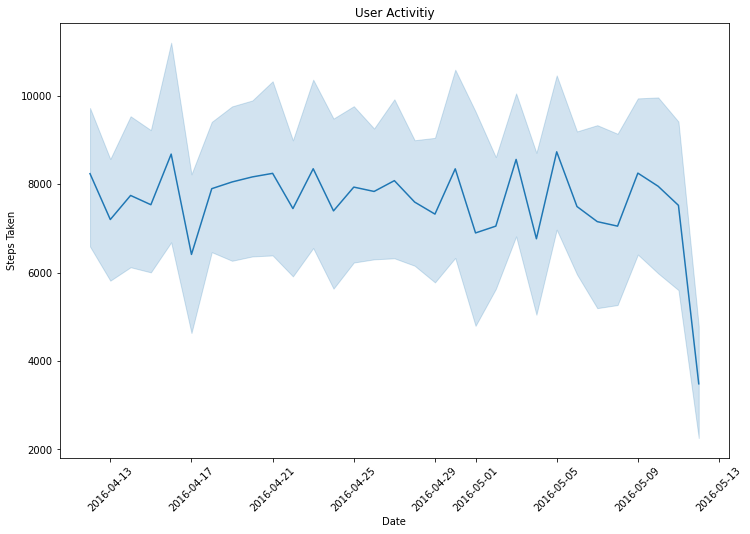

In [291]:
#Steps over Time
sns.lineplot(data = updated_daily_activity, x="activity_date", y="total_steps")

plt.title("User Activitiy")
plt.xlabel("Date")
plt.ylabel("Steps Taken")
plt.xticks(rotation=45)
plt.show()

In [242]:
#%reset

## Observations from Analysis

### Participation 
* Users were inconsistent in tracking across all activities
* 33 participants for physical activity
* 24 participants for sleep activity
* 8 participants for weight logging activity

### Weekday Analysis
* Mid-week is most active for physical and sleep activity
* Tuesday is the most active day for total steps taken and Calories burned
  + Sunday is the least active
* Wednesday is the day with most sleep minutes recorded
  + Monday is the least
* Monday and Wednesday are the most active days for Weight Log recording
  + Friday and Saturday are the least active days

### Weight Log Analysis
* There are more manual logs than automated logs for logging weight
  + This could mean users do not have access to a scale that connects to Fitbit products
* 2 of 8 participants accounted for most of the logs, and the same 2 were most consistent in logging nearly everyday
* The remaining 6 participants were not consistent and randomly logged. 
* There were no drastic changes in weight. The study being only 30 days may account for this.

### Daily Sleep Activity
* Most participants spend roughly the same amount of time in bed and being asleep
* There are some users that stay awake longer in bed before falling asleep 

### Daily Physical Activity
* As total steps increases, the amount of sedentary minutes decreases, as one may assume. 

### Coorelation between Physical and Sleep Activity
* There is a trend showing the more sleep you get, the less steps you take. 
  + This could mean that there is less time to be active if you sleep longer
* There is not a strong correlation between the amount of sleep and the amount of calories burned. 

***

# Step 6 - Act

## Final Conclusions
* Overall, users were not consistent with tracking physical activity, sleep activity, and logging weight.
Potential reasons:
  + Users were forgetting to wear the device during physical activity and during sleep
  + Users were not wanting to wear the device due to comfortability
  + Users were forgetting to manually log activity
  + Users were not finding the tracking process easy and convenient
* Users were more consistent with tracking physical activities, which could indicate that the device is not comfortable enough to wear during sleep, and that the device does not allow easy weight logging entries.
* 96% of logged physical activity records are automated. Meaning users rely on activity being automatically detected and logged, and not manually entered. 

## Recommendations
To meet the goal to empower women with knowledge about their own health and habits, the following recommendations for marketing are to:

#### Create and Advertise 
* A more comfortable Time device that allows all-day wear for consistent tracking which leads to more complete health data 
* Daily challenges to provide incentive to stay consistent with all activities - physical, sleep, and logging each day of the week
* An easy and convenient tracking process focused on automated activity tracking, and less need for manual intervention. 
* Reminders to log activity that cannot be automatically gathered - 
reproductive health, weight, stress

## Next Steps
* More forward with recommendations with the insights gained from the limited data
* Expand upon the limited data and timeframe by conducting another  survey to gather specific and categorical data that targets the female audience